In [1]:
#import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df_raw=pd.read_csv("./Data_Processed_All_Contractors_Characteristics - Data.csv")
df_raw.head(10)
df_raw.shape
df_raw.columns

Index(['Dealer ID', 'year', 'train_test', 'Converted State-AL',
       'Converted State-AR', 'Converted State-CA', 'Converted State-FL',
       'Converted State-GA', 'Converted State-IL', 'Converted State-IN',
       'Converted State-KY', 'Converted State-LA', 'Converted State-MI',
       'Converted State-MO', 'Converted State-NC', 'Converted State-NJ',
       'Converted State-OH', 'Converted State-Others', 'Converted State-PA',
       'Converted State-SC', 'Converted State-TN', 'Converted State-TX',
       'employeebucket-NA', 'employeebucket-4~8', 'employeebucket-<4',
       'employeebucket->8', 'No. of Employees', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Gibson 18.Column3', 'Hitting Potential 16.Column3',
       'JS 16.Column3', 'JS 17

In [3]:
df_2017 = df_raw.loc[df_raw['year'] == 2017]
df_2017_xy = df_2017.iloc[:,:58].drop(['Dealer ID','No. of Employees','year','applied 2016','JS 16.Column3','JS 18.Column3','JS 19.Column3','NON USER 16.Column3','NON USER 18.Column3','centurty 18.Column3','Gibson 18.Column3','Hitting Potential 16.Column3'],axis=1)
train_df = df_2017_xy.loc[df_2017_xy['train_test'] == 1].drop('train_test',axis = 1)
test_df = df_2017_xy.loc[df_2017_xy['train_test'] == 0].drop('train_test',axis = 1)
x_train = train_df.iloc[:,:44]
y_train = train_df['applied 2017']
x_test = test_df.iloc[:,:44]
y_test = test_df['applied 2017']

In [4]:
column_list=list(df_raw.columns)
# print(column_list)

In [5]:
def find_index(name):
    index_num = column_list.index(name)
    print(index_num)

In [6]:
find_index('applied 2017')

57


In [7]:
df_2017_xy.columns

Index(['train_test', 'Converted State-AL', 'Converted State-AR',
       'Converted State-CA', 'Converted State-FL', 'Converted State-GA',
       'Converted State-IL', 'Converted State-IN', 'Converted State-KY',
       'Converted State-LA', 'Converted State-MI', 'Converted State-MO',
       'Converted State-NC', 'Converted State-NJ', 'Converted State-OH',
       'Converted State-Others', 'Converted State-PA', 'Converted State-SC',
       'Converted State-TN', 'Converted State-TX', 'employeebucket-NA',
       'employeebucket-4~8', 'employeebucket-<4', 'employeebucket->8',
       'Sales between 0-99,999', 'Sales between 100,000-499,999',
       'Other Sales', 'Sales N/A', 'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'JS 17.Column3', 'NON USER 17.Column3',
       'Velocity 17.Column3', 'brand_1', 'brand_2', 'brand_3', 'brand_4',
       'brand_5',

In [8]:
df_2017_xy.shape

(1233, 46)

In [9]:
df_2017 = df_raw.loc[df_raw['year'] == 2017]
df_2017_xy = df_2017.iloc[:,:58].drop(['Dealer ID','No. of Employees','year','applied 2016','JS 16.Column3','JS 18.Column3','JS 19.Column3','NON USER 16.Column3','NON USER 18.Column3','centurty 18.Column3','Gibson 18.Column3','Hitting Potential 16.Column3'],axis=1)
train_df = df_2017_xy.loc[df_2017_xy['train_test'] == 1].drop('train_test',axis = 1)
test_df = df_2017_xy.loc[df_2017_xy['train_test'] == 0].drop('train_test',axis = 1)
x_train = train_df.iloc[:,:44]
y_train = train_df['applied 2017']
x_test = test_df.iloc[:,:44]
y_test = test_df['applied 2017']



In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
predict_results = clf.predict(x_test)

In [11]:
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test, predict_results)
print(conf_mat)

0.5708502024291497
[[98 28]
 [78 43]]


**Model Evaluation**

     1. Confusion Matrix
     2 TP, FP, TN, FN
     3. Accuracy Rate
     4. PPV & NPV
     5. Sensitivity & Specificity
     6. F1 Score
     7. Cumulative Gains Chart
     8. AUC-ROC Curve

In [12]:
from sklearn.metrics import confusion_matrix 
matrix = confusion_matrix(y_test.values, predict_results, labels=None, sample_weight=None)
def metrix_matrix(matrix):
    df_matrix=pd.DataFrame(matrix,columns=['pred_negative','pred_positive'],index=['actual_negative','actual_positive'])
    tn, fp, fn, tp=matrix.ravel()
    acc=(tp+tn)/(tp+tn+fp+fn)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    summary_matrix=[acc,ppv,npv,tpr,tnr]
    df_summary=pd.DataFrame(summary_matrix,columns=['Value'],index=['Accuracy','PPV','NPV','Sensitivity','Specificity'])
    return df_matrix,df_summary

In [13]:
df_matrix,df_summary = metrix_matrix(matrix)
df_matrix

,pred_negative,pred_positive
actual_negative,98,28
actual_positive,78,43


In [14]:
df_summary

,Value
Accuracy,0.570850
PPV,0.605634
NPV,0.556818
Sensitivity,0.355372
Specificity,0.777778


In [15]:
pred_prob = clf.predict_proba(x_test)
df_pred_positive_prob=pd.DataFrame(pred_prob).drop(0,axis=1)
df_test_result=df_pred_positive_prob.rename(columns={1:'Predict_Positive_Prob'})
df_test_result['Predict']=predict_results
df_test_result['Actual']=y_test.tolist()
contractor_id = df_2017.loc[(df_2017['train_test'] == 0),'Dealer ID'].values
df_test_result['Contractor_ID']=contractor_id

#calculate true positive and its cumulative
df_test_result=df_test_result.sort_values(by=["Predict_Positive_Prob"],ascending=False).reset_index(drop=True)
df_test_result["True_Positive"]=df_test_result.apply(lambda x: ((x["Actual"]==x["Predict"]) & (x["Actual"]==1))*1,axis=1)
df_test_result["Cumulative_True_Positive"]=df_test_result["True_Positive"].cumsum() #numpy
total_true_positive=df_test_result["True_Positive"].sum()

#calculate % cumulative true positive counts vs % ID counts (linear)
df_test_result["%_Cumulative_True_Positive"]=df_test_result["Cumulative_True_Positive"]/total_true_positive
df_test_result["%_Cumulative_Count"]=df_test_result["Contractor_ID"].expanding().count()/df_test_result["Contractor_ID"].count() #.expanding(): pandas

df_test_result.head(10)

,Predict_Positive_Prob,Predict,Actual,Contractor_ID,True_Positive,Cumulative_True_Positive,%_Cumulative_True_Positive,%_Cumulative_Count
0,0.869565,1,0,C17462,0,0,0.000000,0.004049
1,0.869565,1,0,C17149,0,0,0.000000,0.008097
2,0.869565,1,1,C17122,1,1,0.023256,0.012146
3,0.869565,1,1,C17442,1,2,0.046512,0.016194
4,0.869565,1,0,C17369,0,2,0.046512,0.020243
5,0.869565,1,1,C17055,1,3,0.069767,0.024291
6,0.869565,1,1,C17300,1,4,0.093023,0.028340
7,0.857143,1,0,C17923,0,4,0.093023,0.032389
8,0.857143,1,1,C17035,1,5,0.116279,0.036437
9,0.653061,1,1,C16988,1,6,0.139535,0.040486


Text(0, 0.5, 'Cumulative % True Positives')

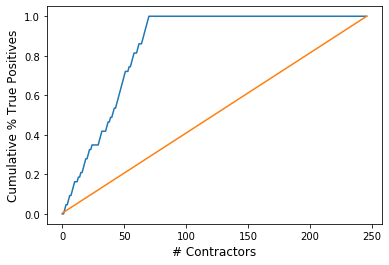

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_test_result["%_Cumulative_True_Positive"].values.tolist())
plt.plot(df_test_result["%_Cumulative_Count"].values.tolist())
plt.xlabel('# Contractors',fontsize=12)
plt.ylabel('Cumulative % True Positives',fontsize=12)

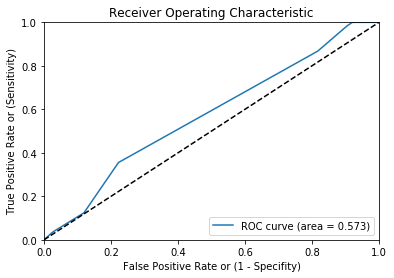

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(df_test_result["Actual"].values.tolist(), df_test_result["Predict_Positive_Prob"].values.tolist())
roc_auc = auc(fpr,tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")